# T-SNE Visualization on Amazon reviews with polarity based color coding

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data

In [3]:
#Data here used is preprocessed(deduplication,removal of html tags,punctuation,stop words,stemming)
con =sqlite3.connect(r'C:\Users\Friend\AI\AI_datasets\Amazon\cleaned_database.sqlite')
filtered_data  = pd.read_sql_query('SELECT * FROM Reviews WHERE Score != 3',con)
filtered_data = filtered_data.drop('index',axis = 1)

#considering 100 positive and negative points(Labels have been changed to positive(1) and negative(0))
data_positive = filtered_data[filtered_data['Score']=='positive'].head(1000)
data_negative = filtered_data[filtered_data['Score']=='negative'].head(1000)
data = pd.concat([data_positive,data_negative])

print(data.shape)
print(data.columns)

(2000, 11)
Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'CleanedText'],
      dtype='object')


# BOW

(2000, 7125)
(2000, 2)
(2000, 3)


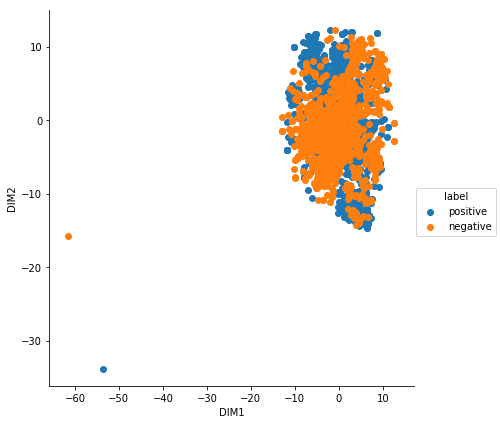

In [102]:
# Performing BOW on review
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
text_vector = count_vect.fit_transform(data['CleanedText'].values)

#converting to dense vector
dense_data = text_vector.toarray()
print(dense_data.shape)

#dimensionality reduction
from sklearn.manifold import TSNE
tsne_data_bow = TSNE(n_components = 2,random_state = 0,perplexity = 50).fit_transform(dense_data)
print(tsne_data_bow.shape)

#appending labels
tsne_data_bow = np.vstack((tsne_data.T,data['Score'])).T

#final dataframe
Projected_vector = pd.DataFrame(tsne_data_bow,columns=['DIM1','DIM2','label'])
print(Projected_vector.shape)

#plot
sns.FacetGrid(Projected_vector, hue="label", size=6).map(plt.scatter, 'DIM1', 'DIM2').add_legend()
plt.show()

(2000, 7125)


C:\Users\Friend\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


(2000, 2)
(2000, 3)


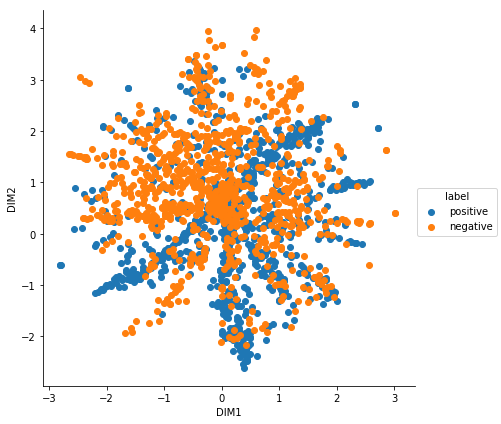

In [5]:
# Performing BOW on review
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
text_vector = count_vect.fit_transform(data['CleanedText'].values)

#converting to dense vector
dense_data = text_vector.toarray()
print(dense_data.shape)

#dimensionality reduction
from sklearn.manifold import TSNE
tsne_data_bow = TSNE(n_components = 2,random_state = 0,perplexity = 500).fit_transform(dense_data)
print(tsne_data_bow.shape)

#appending labels
tsne_data_bow = np.vstack((tsne_data_bow.T,data['Score'])).T

#final dataframe
Projected_vector = pd.DataFrame(tsne_data_bow,columns=['DIM1','DIM2','label'])
print(Projected_vector.shape)

#plot
sns.FacetGrid(Projected_vector, hue="label", size=6).map(plt.scatter, 'DIM1', 'DIM2').add_legend()
plt.show()

(2000, 7125)


C:\Users\Friend\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


(2000, 2)
(2000, 3)


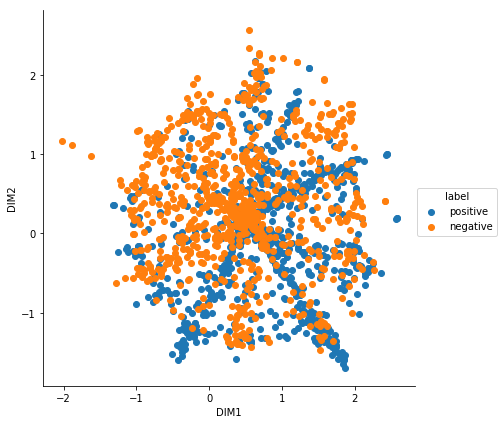

In [6]:
# Performing BOW on review
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
text_vector = count_vect.fit_transform(data['CleanedText'].values)

#converting to dense vector
dense_data = text_vector.toarray()
print(dense_data.shape)

#dimensionality reduction
from sklearn.manifold import TSNE
tsne_data_bow = TSNE(n_components = 2,random_state = 0,perplexity = 1000).fit_transform(dense_data)
print(tsne_data_bow.shape)

#appending labels
tsne_data_bow = np.vstack((tsne_data_bow.T,data['Score'])).T

#final dataframe
Projected_vector = pd.DataFrame(tsne_data_bow,columns=['DIM1','DIM2','label'])
print(Projected_vector.shape)

#plot
sns.FacetGrid(Projected_vector, hue="label", size=6).map(plt.scatter, 'DIM1', 'DIM2').add_legend()
plt.show()

# tf-idf

(2000, 74930)
(2000, 74930)
(2000, 2)
(2000, 3)


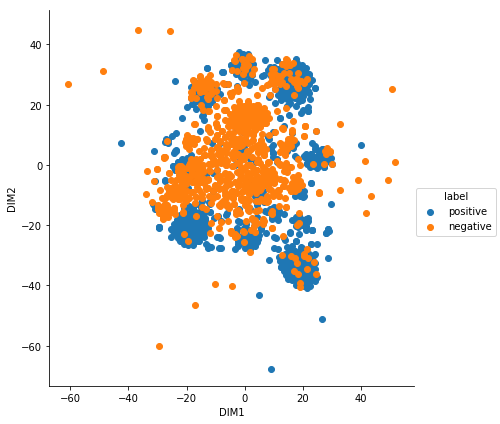

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(data['CleanedText'].values)
print(final_tf_idf.shape)

#converting to dense vector
dense_data = final_tf_idf.toarray()
print(dense_data.shape)

#dimensionality reduction
from sklearn.manifold import TSNE
tsne_data_bow = TSNE(n_components = 2,random_state = 0,perplexity = 50).fit_transform(dense_data)
print(tsne_data_bow.shape)

#appending labels
tsne_data_bow = np.vstack((tsne_data_bow.T,data['Score'])).T

#final dataframe
Projected_vector = pd.DataFrame(tsne_data_bow,columns=['DIM1','DIM2','label'])
print(Projected_vector.shape)

#plot
sns.FacetGrid(Projected_vector, hue="label", size=6).map(plt.scatter, 'DIM1', 'DIM2').add_legend()
plt.show()

(2000, 74930)
(2000, 74930)
(2000, 2)
(2000, 3)


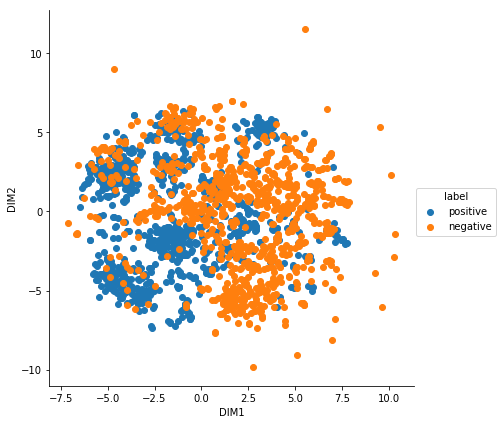

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(data['CleanedText'].values)
print(final_tf_idf.shape)

#converting to dense vector
dense_data = final_tf_idf.toarray()
print(dense_data.shape)

#dimensionality reduction
from sklearn.manifold import TSNE
tsne_data_bow = TSNE(n_components = 2,random_state = 0,perplexity = 500).fit_transform(dense_data)
print(tsne_data_bow.shape)

#appending labels
tsne_data_bow = np.vstack((tsne_data_bow.T,data['Score'])).T

#final dataframe
Projected_vector = pd.DataFrame(tsne_data_bow,columns=['DIM1','DIM2','label'])
print(Projected_vector.shape)

#plot
sns.FacetGrid(Projected_vector, hue="label", size=6).map(plt.scatter, 'DIM1', 'DIM2').add_legend()
plt.show()

(2000, 74930)
(2000, 74930)
(2000, 2)
(2000, 3)


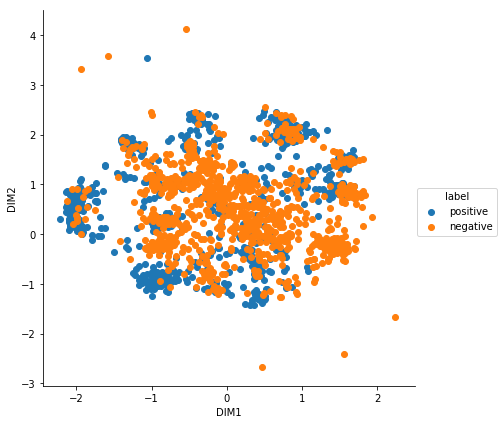

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(data['CleanedText'].values)
print(final_tf_idf.shape)

#converting to dense vector
dense_data = final_tf_idf.toarray()
print(dense_data.shape)

#dimensionality reduction
from sklearn.manifold import TSNE
tsne_data_bow = TSNE(n_components = 2,random_state = 0,perplexity = 1000).fit_transform(dense_data)
print(tsne_data_bow.shape)

#appending labels
tsne_data_bow = np.vstack((tsne_data_bow.T,data['Score'])).T

#final dataframe
Projected_vector = pd.DataFrame(tsne_data_bow,columns=['DIM1','DIM2','label'])
print(Projected_vector.shape)

#plot
sns.FacetGrid(Projected_vector, hue="label", size=6).map(plt.scatter, 'DIM1', 'DIM2').add_legend()
plt.show()

# Avg word2vec

(2000, 2)


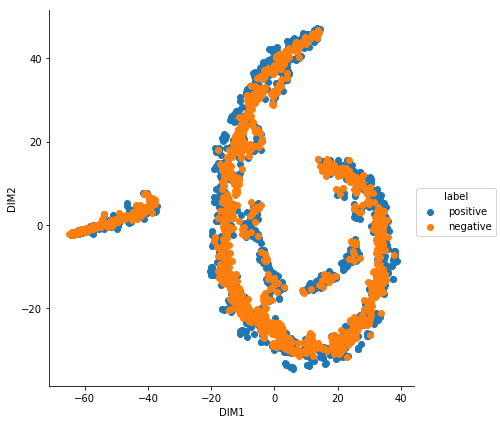

In [97]:
from gensim.models import Word2Vec

i=0
list_of_sent=[]
for sent in data['CleanedText'].values:
    list_of_sent.append(sent.split())

#word2vec
w2v_model=Word2Vec(list_of_sent,min_count=5,size=300, workers=4)
w2v_words = list(w2v_model.wv.vocab)

#Average word2vec
sent_vectors = []; 
for sent in list_of_sent: 
    sent_vec = np.zeros(300) 
    cnt_words =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)


sent_vectors_df = pd.DataFrame(sent_vectors)

#dimensionality reduction
from sklearn.manifold import TSNE
tsne_data_sent_df = TSNE(n_components = 2,random_state = 0,perplexity = 50).fit_transform(sent_vectors_df)
print(tsne_data_sent_df.shape)

#append labels
avgword2vec = np.vstack((tsne_data_sent_df.T,data['Score'])).T

#final dataframe
Projected_vector = pd.DataFrame(avgword2vec,columns=['DIM1','DIM2','label'])

#plot
sns.FacetGrid(Projected_vector, hue="label", size=6).map(plt.scatter, 'DIM1', 'DIM2').add_legend()
plt.show()

C:\Users\Friend\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\Friend\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


(2000, 2)


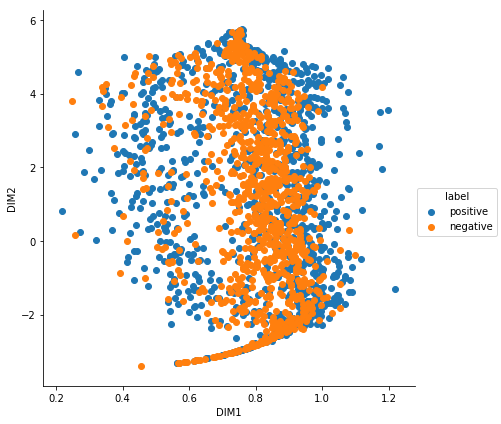

In [9]:
from gensim.models import Word2Vec

i=0
list_of_sent=[]
for sent in data['CleanedText'].values:
    list_of_sent.append(sent.split())

#word2vec
w2v_model=Word2Vec(list_of_sent,min_count=5,size=300, workers=4)
w2v_words = list(w2v_model.wv.vocab)

#Average word2vec
sent_vectors = []; 
for sent in list_of_sent: 
    sent_vec = np.zeros(300) 
    cnt_words =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)


sent_vectors_df = pd.DataFrame(sent_vectors)

#dimensionality reduction
from sklearn.manifold import TSNE
tsne_data_sent_df = TSNE(n_components = 2,random_state = 0,perplexity = 1000).fit_transform(sent_vectors_df)
print(tsne_data_sent_df.shape)

#append labels
avgword2vec = np.vstack((tsne_data_sent_df.T,data['Score'])).T

#final dataframe
Projected_vector = pd.DataFrame(avgword2vec,columns=['DIM1','DIM2','label'])

#plot
sns.FacetGrid(Projected_vector, hue="label", size=6).map(plt.scatter, 'DIM1', 'DIM2').add_legend()
plt.show()

C:\Users\Friend\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


(2000, 2)


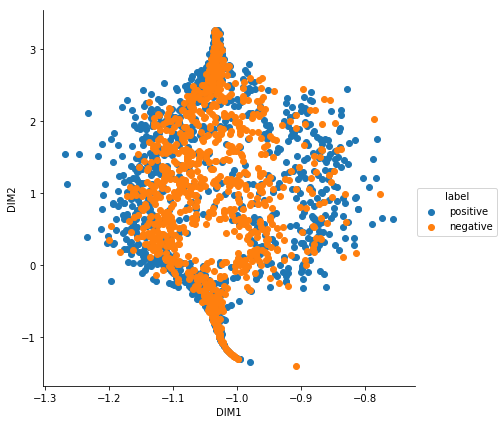

In [11]:
from gensim.models import Word2Vec

i=0
list_of_sent=[]
for sent in data['CleanedText'].values:
    list_of_sent.append(sent.split())

#word2vec
w2v_model=Word2Vec(list_of_sent,min_count=5,size=300, workers=4)
w2v_words = list(w2v_model.wv.vocab)

#Average word2vec
sent_vectors = []; 
for sent in list_of_sent: 
    sent_vec = np.zeros(300) 
    cnt_words =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)


sent_vectors_df = pd.DataFrame(sent_vectors)

#dimensionality reduction
from sklearn.manifold import TSNE
tsne_data_sent_df = TSNE(n_components = 2,random_state = 0,perplexity = 1500).fit_transform(sent_vectors_df)
print(tsne_data_sent_df.shape)

#append labels
avgword2vec = np.vstack((tsne_data_sent_df.T,data['Score'])).T

#final dataframe
Projected_vector = pd.DataFrame(avgword2vec,columns=['DIM1','DIM2','label'])

#plot
sns.FacetGrid(Projected_vector, hue="label", size=6).map(plt.scatter, 'DIM1', 'DIM2').add_legend()
plt.show()

# tfidf word2vec

(2000, 2)


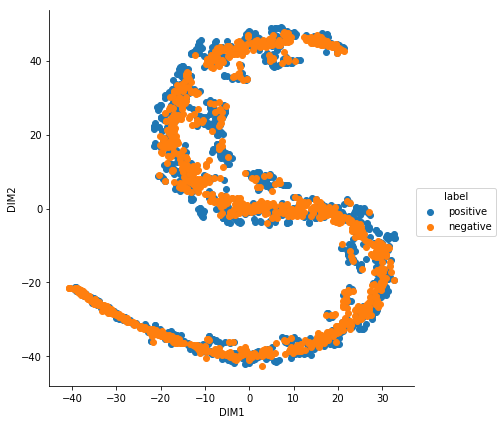

In [98]:
import gensim

i=0
list_of_sent=[]
for sent in data['CleanedText'].values:
    list_of_sent.append(sent.split())

#get tf_idf
tfidf_feat = tf_idf_vect.get_feature_names()
tfidf_sent_vectors = []; 

#word2vec
w2v_model=Word2Vec(list_of_sent,min_count=5,size=300, workers=4)
w2v_words = list(w2v_model.wv.vocab)

#tfidf wieghted vector
row=0;
for sent in list_of_sent: 
    sent_vec = np.zeros(300) 
    weight_sum =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]            
            tf_idf = final_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        else:
            continue
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

tfidf_sent_vectors_df = pd.DataFrame(tfidf_sent_vectors)

#dimensionality reduction
from sklearn.manifold import TSNE
tsne_data_sent_df = TSNE(n_components = 2,random_state = 0,perplexity = 50).fit_transform(tfidf_sent_vectors_df)
print(tsne_data_sent_df.shape)

#append labels to it
tfidf_weight = np.vstack((tsne_data_sent_df.T,data['Score'])).T

#final dataframe
Projected_vector = pd.DataFrame(tfidf_weight,columns=['DIM1','DIM2','label'])

#plot
sns.FacetGrid(Projected_vector, hue="label", size=6).map(plt.scatter, 'DIM1', 'DIM2').add_legend()
plt.show()

C:\Users\Friend\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


(2000, 2)


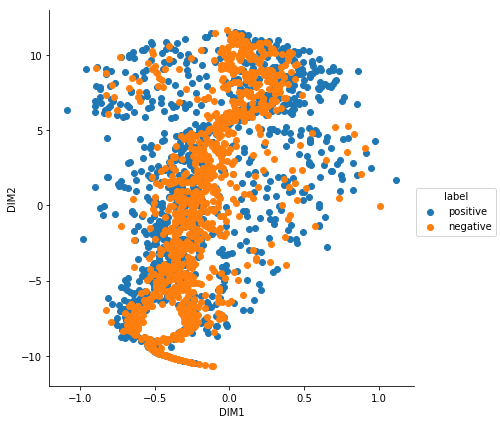

In [15]:
import gensim

i=0
list_of_sent=[]
for sent in data['CleanedText'].values:
    list_of_sent.append(sent.split())

#get tf_idf
tfidf_feat = tf_idf_vect.get_feature_names()
tfidf_sent_vectors = []; 

#word2vec
w2v_model=Word2Vec(list_of_sent,min_count=5,size=300, workers=4)
w2v_words = list(w2v_model.wv.vocab)

#tfidf wieghted vector
row=0;
for sent in list_of_sent: 
    sent_vec = np.zeros(300) 
    weight_sum =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]            
            tf_idf = final_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        else:
            continue
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

tfidf_sent_vectors_df = pd.DataFrame(tfidf_sent_vectors)

#dimensionality reduction
from sklearn.manifold import TSNE
tsne_data_sent_df = TSNE(n_components = 2,random_state = 0,perplexity = 500).fit_transform(tfidf_sent_vectors_df)
print(tsne_data_sent_df.shape)

#append labels to it
tfidf_weight = np.vstack((tsne_data_sent_df.T,data['Score'])).T

#final dataframe
Projected_vector = pd.DataFrame(tfidf_weight,columns=['DIM1','DIM2','label'])

#plot
sns.FacetGrid(Projected_vector, hue="label", size=6).map(plt.scatter, 'DIM1', 'DIM2').add_legend()
plt.show()

C:\Users\Friend\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


(2000, 2)


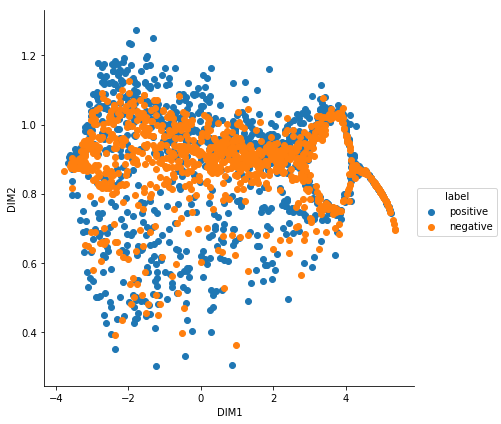

In [13]:
import gensim

i=0
list_of_sent=[]
for sent in data['CleanedText'].values:
    list_of_sent.append(sent.split())

#get tf_idf
tfidf_feat = tf_idf_vect.get_feature_names()
tfidf_sent_vectors = []; 

#word2vec
w2v_model=Word2Vec(list_of_sent,min_count=5,size=300, workers=4)
w2v_words = list(w2v_model.wv.vocab)

#tfidf wieghted vector
row=0;
for sent in list_of_sent: 
    sent_vec = np.zeros(300) 
    weight_sum =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]            
            tf_idf = final_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        else:
            continue
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

tfidf_sent_vectors_df = pd.DataFrame(tfidf_sent_vectors)

#dimensionality reduction
from sklearn.manifold import TSNE
tsne_data_sent_df = TSNE(n_components = 2,random_state = 0,perplexity = 1000).fit_transform(tfidf_sent_vectors_df)
print(tsne_data_sent_df.shape)

#append labels to it
tfidf_weight = np.vstack((tsne_data_sent_df.T,data['Score'])).T

#final dataframe
Projected_vector = pd.DataFrame(tfidf_weight,columns=['DIM1','DIM2','label'])

#plot
sns.FacetGrid(Projected_vector, hue="label", size=6).map(plt.scatter, 'DIM1', 'DIM2').add_legend()
plt.show()